### COVID Data 
- 데이터 출처: https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university
- RAW_global_confirmed_cases.csv
- RAW_global_global_deaths.csv

--[column]

-Country/Region: 국가

-Province/State: 지방/주

-Lat: 지역의 위도

-Long: 지역의 경도

-날짜: 각 날짜의 확진자/사망자 수

In [4]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
#kaggle api 연결
os.environ['KAGGLE_USERNAME'] = 'yeonkyoungkim'
os.environ['KAGGLE_KEY'] = '5468e38439b45370109bbf60ebcedfb9'

In [6]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d antgoldbloom/covid19-data-from-john-hopkins-university
!unzip '*.zip'

 89%|█████████████████████████████████▋    | 5.00M/5.65M [00:00<00:00, 8.89MB/s]
100%|██████████████████████████████████████| 5.65M/5.65M [00:00<00:00, 10.3MB/s]
Archive:  covid19-data-from-john-hopkins-university.zip
  inflating: CONVENIENT_global_confirmed_cases.csv  
  inflating: CONVENIENT_global_deaths.csv  
  inflating: CONVENIENT_global_metadata.csv  
  inflating: CONVENIENT_us_confirmed_cases.csv  
  inflating: CONVENIENT_us_deaths.csv  
  inflating: CONVENIENT_us_metadata.csv  
  inflating: RAW_global_confirmed_cases.csv  
  inflating: RAW_global_deaths.csv   
  inflating: RAW_us_confirmed_cases.csv  
  inflating: RAW_us_deaths.csv       


In [7]:
df_case = pd.read_csv('RAW_global_confirmed_cases.csv')
df_death = pd.read_csv('RAW_global_deaths.csv')

In [8]:
df_case 

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21
0,Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,...,151770,151770,152142,152243,152363,152411,152448,152448,152448,152583
1,Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,...,135550,135947,136147,136598,137075,137597,138132,138790,139324,139721
2,Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,...,186655,187258,187968,188663,189384,190078,190656,191171,191583,192089
3,Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,...,14924,14924,14954,14960,14976,14981,14988,14988,14988,15002
4,Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,...,44534,44617,44739,44972,45175,45325,45583,45817,45945,46076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Vietnam,NaN,14.058324,108.277199,0,2,2,2,2,2,...,265464,275044,283696,293301,302101,312611,323268,336707,348059,358456
275,West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,...,320034,320034,321031,321031,322620,323582,324542,325404,326310,327634
276,Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,...,7273,7293,7308,7347,7372,7407,7454,7487,7509,7539
277,Zambia,NaN,-13.133897,27.849332,0,0,0,0,0,0,...,202078,202261,202429,202787,203169,203553,203978,204337,204549,204651


In [9]:
df_death

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/14/21,8/15/21,8/16/21,8/17/21,8/18/21,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21
0,Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,...,7000,7000,7025,7031,7043,7047,7054,7054,7054,7076
1,Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,...,2463,2464,2466,2468,2471,2473,2475,2477,2478,2478
2,Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,...,4766,4794,4830,4867,4898,4929,4957,4984,5004,5034
3,Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,...,129,129,129,129,129,129,129,129,129,130
4,Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,...,1086,1100,1103,1118,1125,1133,1138,1140,1153,1163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Vietnam,NaN,14.058324,108.277199,0,0,0,0,0,0,...,5437,5774,6141,6472,6770,7150,7540,7540,8277,8666
275,West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,...,3623,3623,3625,3625,3627,3628,3629,3632,3637,3642
276,Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,...,1401,1403,1405,1407,1411,1414,1415,1416,1418,1420
277,Zambia,NaN,-13.133897,27.849332,0,0,0,0,0,0,...,3521,3529,3538,3550,3556,3564,3569,3573,3574,3578


In [10]:
#시계열 데이터 구조로 바꾸기

def fix_dataframe(df):
  # TODO: 불필요한 컬럼 제거, Date를 datetime 객체로 변환, Date를 index로 변경
  df = df.drop(['Lat', 'Long'], axis=1).groupby('Country/Region').sum()
  df = df.transpose()
  df.index.name = 'Date'
  df.reset_index(inplace=True)
  df['Date'] = df['Date'].apply(lambda s: pd.to_datetime(str(s)))
  df.set_index('Date', inplace=True)
  return df

In [11]:
df_case = fix_dataframe(df_case)
df_death = fix_dataframe(df_death)

In [12]:
df_case

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-19,152411,137597,190078,14981,45325,1421,5116803,236234,42228,672819,...,6422515,383758,146459,4,322757,312611,323582,7407,203553,121902
2021-08-20,152448,138132,190656,14988,45583,1447,5124963,236742,43119,674077,...,6459643,383903,147322,4,322757,323268,324542,7454,203978,121902
2021-08-21,152448,138790,191171,14988,45817,1490,5130852,237249,44026,675405,...,6491529,384026,148203,4,324642,336707,325404,7487,204337,122487


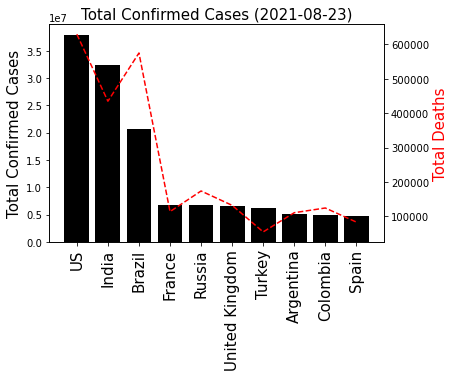

In [13]:
# 나라별 누적 사망자 수와 확진자 수를 시각화하여 비교하기 (최신일자, 가장 많이 확진된 10국가)
top_ten_cases = df_case.loc[df_case.index[-1]].sort_values(ascending=False)[:10]
sns.barplot(x=top_ten_cases.index, y=top_ten_cases, color='black')
plt.xticks(rotation=90, size=15)
plt.ylabel('Total Confirmed Cases', size=15)
plt.xlabel('')
plt.title('Total Confirmed Cases (%s)' % top_ten_cases.name.strftime('%Y-%m-%d'), size=15)

ax = plt.gca()
ax2 = ax.twinx()
top_ten_deaths = df_death.loc[df_death.index[-1]][top_ten_cases.index] #가장 많이 확진된 10국가
ax2.plot(top_ten_deaths.index, top_ten_deaths, 'r--')
ax2.set_ylabel('Total Deaths', color='red', size=15)
plt.show()

In [14]:
# 나라별 시간에 따른 확진자 수 및 사망자 수 시각화하기
def plot_case_with_death(country):
  plt.plot(df_case.index, df_case[country], 'b-')
  plt.ylabel('Confirmed Cases', color='blue')
  plt.title(country + ' Cases & Deaths')
  plt.xlabel('Date')
  plt.xlim(right=df_case.index[-1])
  plt.ylim(0, df_case[country].max()*1.1)

  ax = plt.gca()
  ax2 = ax.twinx()
  ax2.plot(df_death.index, df_death[country], 'r--')
  ax2.set_ylabel('Deaths', color='red')
  ax2.set_ylim(0, df_death[country].max()*1.3)
  plt.show()

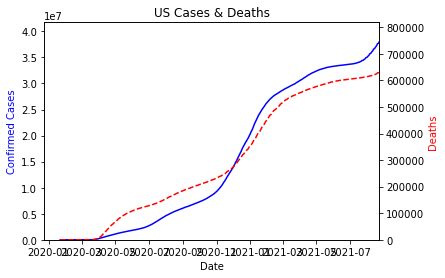

In [15]:
plot_case_with_death('US')

In [16]:
for c in df_case.columns:
  print(c)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives

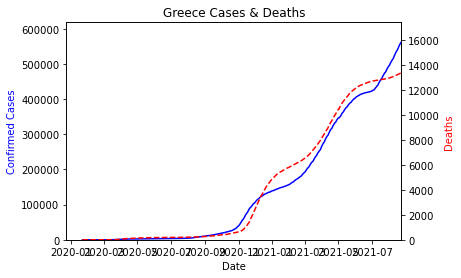

In [17]:
plot_case_with_death('Greece')

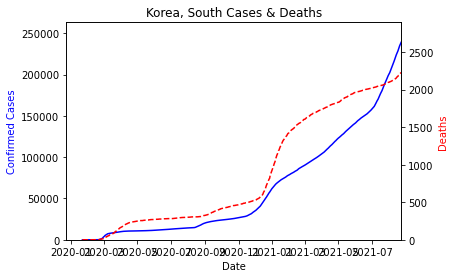

In [18]:
plot_case_with_death('Korea, South') #오...상대적으로..적다...

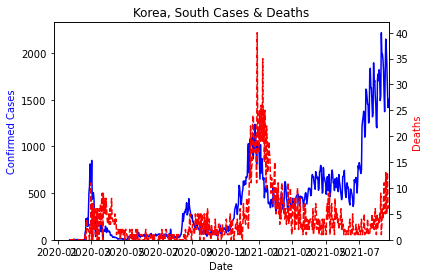

In [19]:
# 한국의 일일 확진자 수/사망자 수를 시각화
country = 'Korea, South'
plt.plot(df_case.index, df_case[country].diff(), 'b-')
plt.ylabel('Confirmed Cases', color='blue')
plt.title(country + ' Cases & Deaths')
plt.xlabel('Date')
plt.xlim(right=df_case.index[-1])
plt.ylim(bottom=0)


ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(df_death.index, df_death[country].diff(), 'r--')
ax2.set_ylabel('Deaths', color='red')
ax2.set_ylim(bottom=0)
plt.show()

In [22]:
#Plotly의 Choropleth (지도 그래프!!!!)
import plotly.graph_objects as go

In [33]:
##########국가명을 국가코드로 변경
df_code = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

# 이름이 다르게 쓰인 국가의 이름을 먼저 변경한 후에 코드로 변경
country_renamer = {
    'Bahamas':'Bahamas, The',
    'Congo (Brazzaville)':'Congo, Republic of the',
    'Congo (Kinshasa)':'Congo, Democratic Republic of the',
    'Czechia':'Czech Republic',
    'Eswatini':'Swaziland',
    'Gambia':'Gambia, The',
    'North Macedonia':'Macedonia',
    'Taiwan*':'Taiwan',
    'US':'United States',
    'West Bank and Gaza':'West Bank'}

In [34]:
df_code

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
...,...,...,...
217,Virgin Islands,5.08,VGB
218,West Bank,6.64,WBG
219,Yemen,45.45,YEM
220,Zambia,25.61,ZMB


In [35]:
country_to_code = df_code.set_index('COUNTRY')['CODE']
country_to_code

COUNTRY
Afghanistan       AFG
Albania           ALB
Algeria           DZA
American Samoa    ASM
Andorra           AND
                 ... 
Virgin Islands    VGB
West Bank         WBG
Yemen             YEM
Zambia            ZMB
Zimbabwe          ZWE
Name: CODE, Length: 222, dtype: object

In [39]:
df_c = df_case.rename(country_renamer, axis=1).copy()
for col in df_c.columns:
  if col not in country_to_code.index:
    df_c.drop(col, axis=1, inplace=True)
df_code = df_c.rename(country_to_code, axis=1)
df_code

Country/Region,AFG,ALB,DZA,AND,AGO,ATG,ARG,ARM,AUS,AUT,...,GBR,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-19,152411,137597,190078,14981,45325,1421,5116803,236234,42228,672819,...,6422515,383758,146459,4,322757,312611,323582,7407,203553,121902
2021-08-20,152448,138132,190656,14988,45583,1447,5124963,236742,43119,674077,...,6459643,383903,147322,4,322757,323268,324542,7454,203978,121902
2021-08-21,152448,138790,191171,14988,45817,1490,5130852,237249,44026,675405,...,6491529,384026,148203,4,324642,336707,325404,7487,204337,122487


In [40]:
def get_choropleth_data(date):
  # TODO: date에 해당하는 날짜로 데이터 생성
  data = go.Choropleth(
      locations = df_code.columns,
      z = df_code.loc[date],
      text = df_c.columns,
      colorscale = 'Blues',
      autocolorscale=False,
      reversescale=True,
      marker_line_color='darkgray',
      marker_line_width=0.5,
      colorbar_tickprefix = '',
      colorbar_title = 'Confirmed Cases',
  )
  return data

In [67]:
date = df_case.index[90]
data = get_choropleth_data(date)
fig = go.Figure(data=data)
fig.update_layout(
    title_text='Confirmed Cases in ' + str(date),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()

### FBprophet model

In [43]:
##모델 학습을 위한 전처리
# 공식 레퍼런스 참조: https://facebook.github.io/prophet/docs/quick_start.html#python-api
# 한국의 확진자 수 데이터를 FBProphet에 학습하기 위한 데이터프레임으로 재구성
df = pd.DataFrame(df_case.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds', 'y'])
df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
575,2021-08-19,232859
576,2021-08-20,234739
577,2021-08-21,236366
578,2021-08-22,237782


In [46]:
from math import floor
def train_test_split_df(df, test_size):
  # TODO: test_size(0 < test_size < 1) 비율에 따라 테스트/학습 데이터프레임으로 나누어 반환
  div = floor(df.shape[0] * (1 - test_size))
  return df.loc[:div], df.loc[div + 1:]

In [71]:
train_df, test_df = train_test_split_df(df, 0.01)

In [72]:
train_df

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3
...,...,...
570,2021-08-14,223928
571,2021-08-15,225481
572,2021-08-16,226854
573,2021-08-17,228657


In [73]:
test_df

,ds,y
575,2021-08-19,232859
576,2021-08-20,234739
577,2021-08-21,236366
578,2021-08-22,237782
579,2021-08-23,239287


In [74]:
model = Prophet(changepoint_range=1.0)
model.fit(train_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


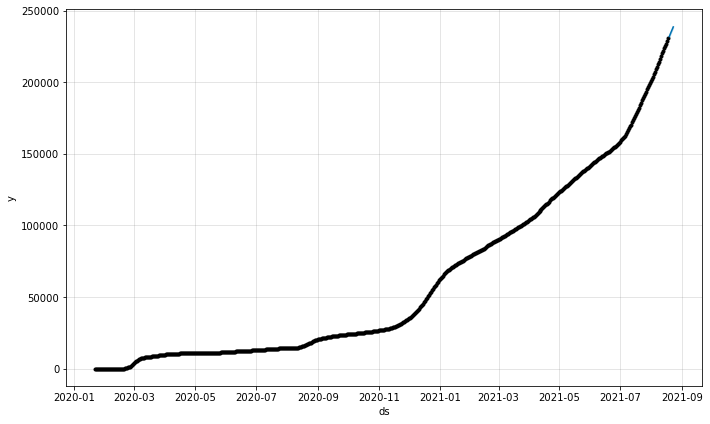

In [75]:
#모델 학습 결과 시각화
from fbprophet.plot import add_changepoints_to_plot
# model.plot() 메소드, model.plot_components() 메소드, add_changepoints_to_plot() 메소드 활용
pred = model.predict(test_df)
model.plot(pred);

In [76]:
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-19,231862.383454,231434.977452,232307.169696,231862.383454,231862.383454,16.625542,16.625542,16.625542,16.625542,16.625542,16.625542,0.0,0.0,0.0,231879.008996
1,2021-08-20,233567.781249,233129.498588,234064.852443,233567.781249,233567.781249,47.232397,47.232397,47.232397,47.232397,47.232397,47.232397,0.0,0.0,0.0,233615.013646
2,2021-08-21,235273.179043,234807.987219,235853.692761,235273.179043,235273.179043,51.064233,51.064233,51.064233,51.064233,51.064233,51.064233,0.0,0.0,0.0,235324.243275
3,2021-08-22,236978.576837,236439.426230,237506.211364,236978.576837,236978.576837,-9.269886,-9.269886,-9.269886,-9.269886,-9.269886,-9.269886,0.0,0.0,0.0,236969.306950
4,2021-08-23,238683.974631,238128.361626,239125.254444,238683.974631,238704.872814,-71.187172,-71.187172,-71.187172,-71.187172,-71.187172,-71.187172,0.0,0.0,0.0,238612.787459


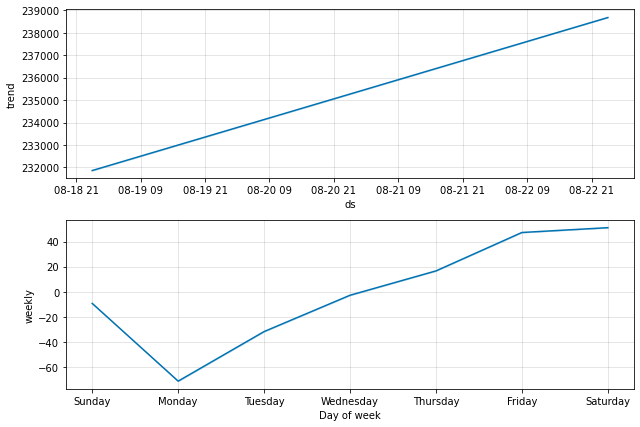

In [77]:
model.plot_components(pred);  #fri,sat에 가장 높음...

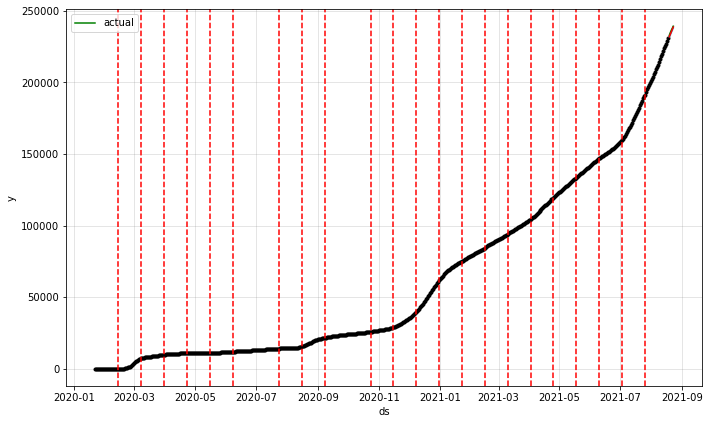

In [78]:
fig = model.plot(pred)
plt.plot(test_df['ds'], test_df['y'], 'g-', label='actual')
changes = add_changepoints_to_plot(fig.gca(), model, pred)
plt.legend()

In [79]:
#학습결과 평가
from sklearn.metrics import r2_score
# test_df와 pred를 비교하여 r2_score 평가
print('R2 Score: ', r2_score(test_df['y'], pred['yhat']))

R2 Score:  0.8255268288577353


## Prophet 모델로 미래 30일 데이터 예측


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


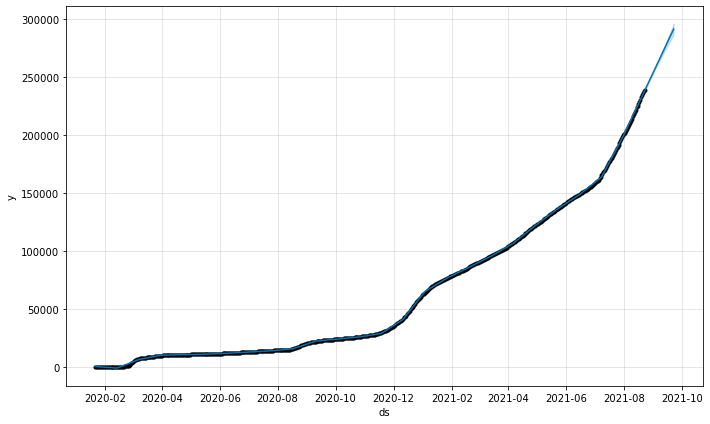

In [80]:
# 전체 df를 학습한 후, 향후 30일에 대한 데이터 예측하기
# make_future_dataframe() 메소드 활용
model = Prophet(changepoint_range=1.0)  #후반의 급격한 변화때문에 학습이 잘 되지 않아 changepoint_range 높임
model.fit(df)
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);

In [81]:
pred.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [93]:
result=pred[['ds','yhat']][580:]

In [94]:
result['daily_predict']=result['yhat'].diff()

In [95]:
result  #우와...줄지 않는다... 누적 확진자수로 학습시켜서 그런걸수두 있음

,ds,yhat,daily_predict
580,2021-08-24,241007.270177,NaN
581,2021-08-25,242783.426397,1776.156220
582,2021-08-26,244558.159293,1774.732896
583,2021-08-27,246320.173703,1762.014410
584,2021-08-28,248049.012121,1728.838418
585,2021-08-29,249718.797464,1669.785343
586,2021-08-30,251400.052475,1681.255011
587,2021-08-31,253185.441970,1785.389495
588,2021-09-01,254961.598190,1776.156220
589,2021-09-02,256736.331086,1774.732896


In [ ]:
## 

In [97]:
# 코로나 확산 초기, 한국의 확진자 수가 급증한 시점 찾기
df['ds'][10]
df.loc[24:30]

,ds,y
24,2020-02-15,28
25,2020-02-16,29
26,2020-02-17,30
27,2020-02-18,31
28,2020-02-19,31
29,2020-02-20,104
30,2020-02-21,204


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


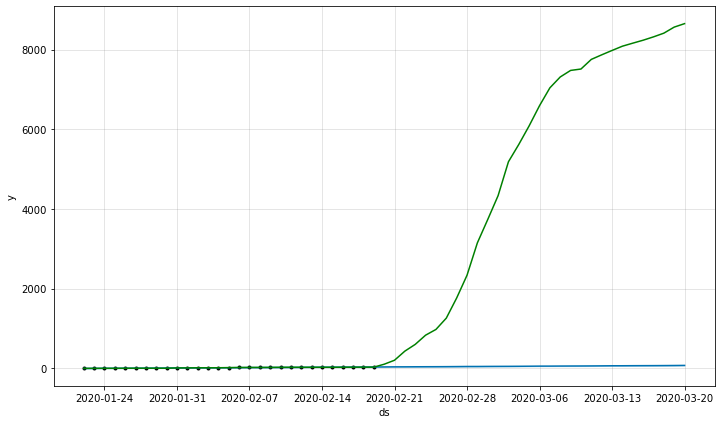

In [98]:
#급증한 시점이 없었다면? 몇명이였을까
# 확진자 수가 급증하기 전 데이터를 학습 후, 해당 시점으로부터 30일 간의 데이터 예측하여 실제 값과 비교하기
model = Prophet(changepoint_range=1.0)
model.fit(df.loc[:28])
future = model.make_future_dataframe(30)
pred = model.predict(future)
model.plot(pred);
plt.plot(df.loc[:58]['ds'], df.loc[:58]['y'], 'g-')
plt.show()